In [1]:
from pipeNetwork import pipeNetwork
from containerClass import container
import numpy as np
from scipy.integrate import solve_ivp
import igraph
from calcTw import calcTw
from calcQ import calcQ
from containerClass import container
#from systemDefinitions import system,nodes,nodes1,pipeSections,pipeSections1
from systemDefinitions import system,pipeSections,pipeSections1, pipeSections3,orificeDiam3,pipeSections4,pipeSections0,orificeDiam0
from orificeForward import main_nozzle_forward, mass_critical
import matplotlib.pyplot as plt
from scipy.optimize import fsolve,root
#!pip install --user --upgrade pixiedust

In [2]:
import pixiedust

Pixiedust database opened successfully


Unable to check latest version <urlopen error [WinError 10061] No connection could be made because the target machine actively refused it>


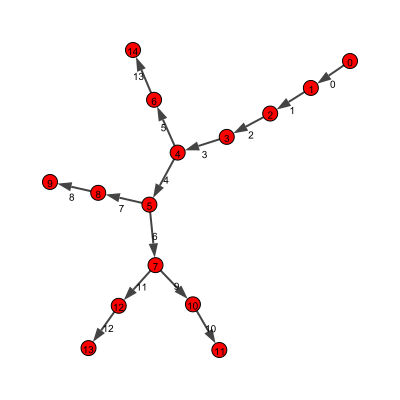

In [8]:
net1 = pipeNetwork()
net1.addAllPipes(pipeSections3,orificeDiam3)
net0 = pipeNetwork()
net0.addAllPipes(pipeSections0,orificeDiam0)
[i for i in net0.t.vs]
net1.plot("index","index")

In [12]:
net = net1
node = net.t.vs[13]
edge = net.t.es[12]
net.findNext(node,edge)

([13, 12, 7], 3)